## 1. import libraries ##

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

## 2. import data ##

In [4]:
iris = load_iris()
iris.target
## 아래와 같이 target이 미리 지정되어 있어야 lda 수행 가능

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
## pca와 마찬가지로 scale 후 분석 진행
iris_scaled = StandardScaler().fit_transform(iris.data)

In [12]:
## lda 모델 세우기 ##
## n_comp는 차원의 수
lda = LinearDiscriminantAnalysis(n_components = 2) #1,3으로도 해볼것
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)
iris_lda

(150, 2)


array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

In [18]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [13]:
lda_columns = ['comp1','comp2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

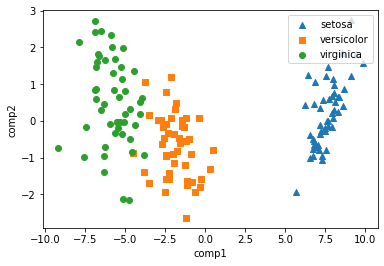

In [15]:
## 시각화
markers = ['^','s','o']

for i,marker in enumerate(markers) :
    x_data = irisDF_lda[irisDF_lda['target']==i]['comp1']
    y_data = irisDF_lda[irisDF_lda['target']==i]['comp2']
    
    plt.scatter(x_data,y_data, marker = marker, label = iris.target_names[i])
    
plt.legend(loc='upper right')
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()
    

In [23]:
## train & test
X = np.array(iris_scaled)
y = np.array(iris.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
X_transform = lda.fit(X_train, y_train).transform(X_train)
y_predict = lda.fit(X_train, y_train).predict(X_test)


metrics.accuracy_score(y_test, y_predict)

0.98